### Logistic Regression : 
### It is supervised machine learning algorithm for Binary classification  
### Analyzes the relationship between one or more independent variables and classifies data into discrete classes

### Sigmoid Activation functions will be using in this algorithm
### 1 / (1 + e ( power of ) -z )

### Cost Functions :
#### log loss functions or cross-entropy functions

### Performance Metrics :
#### 1) Confussion Matrix
#### 2) Accuracy
#### 3) Error Rate or Misclassification rate
#### 4) Precision
#### 5) Recall or sensitivity
#### 6) Specificity
#### 7) F-score 
#### 8) ROC-AUC (Reciver Operating Characterstic and Area under Curve ) : 
#### The ROC curve plots the true positive rate (TPR) versus the false positive rate (FPR) at different classification thresholds

## Logistic Regression Implmentation :

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df=df[df['species']!='setosa']

In [5]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [6]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [7]:
df['species']=df['species'].map({"versicolor":0,"virginica":1})

In [8]:
## Features into independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,6.6,2.1
138,6.0,3.0,4.8,1.8
76,6.8,2.8,4.8,1.4
92,5.8,2.6,4.0,1.2
119,6.0,2.2,5.0,1.5
...,...,...,...,...
110,6.5,3.2,5.1,2.0
121,5.6,2.8,4.9,2.0
64,5.6,2.9,3.6,1.3
142,5.8,2.7,5.1,1.9


In [13]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

### Please see the official Algorithm parameters

In [14]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)


/home/pradeep.k@zucisystems.com/workspace_working_Repo/DataScience/envname1/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pradeep.k@zucisystems.com/workspace_working_Repo/DataScience/envname1/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pradeep.k@zucisystems.com/workspace_working_Repo/DataScience/envname1/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [15]:
print(log_regressor.best_params_)

{'C': 10, 'penalty': 'l2'}


In [16]:
#Accuracy
print(log_regressor.best_score_)

0.97


In [17]:
prediction_log=log_regressor.predict(X_test)

In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


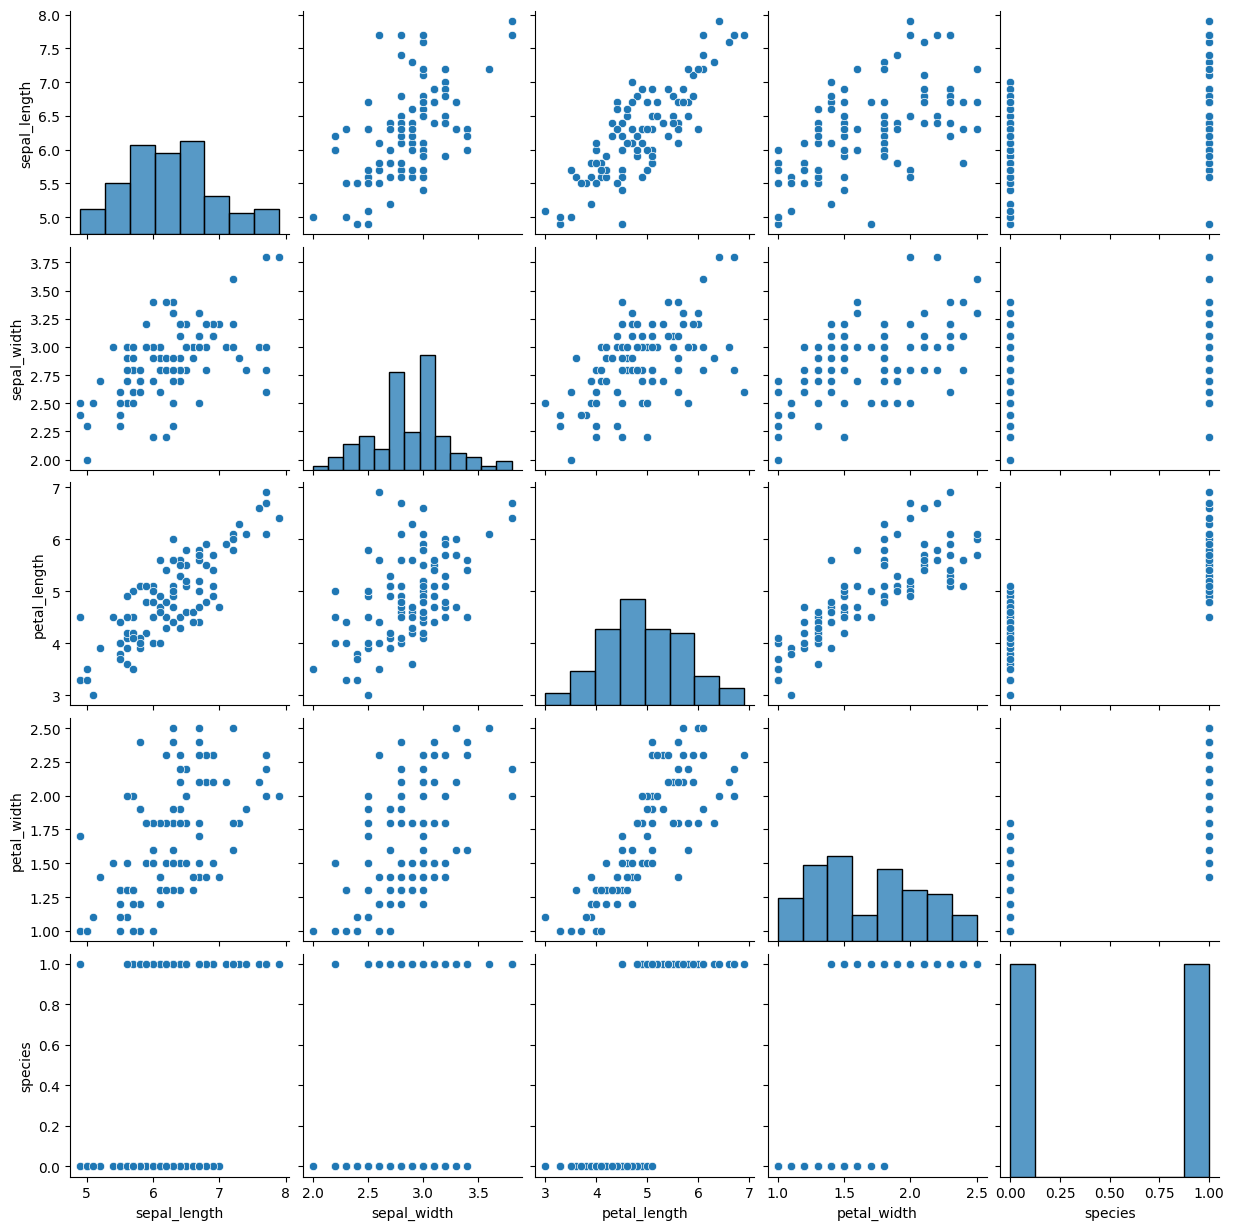

In [19]:
sns.pairplot(df)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [21]:
confusion_matrix(y_test,prediction_log)

array([[11,  1],
       [ 0,  8]])

In [22]:
f1_score(y_test,prediction_log)

0.9411764705882353